In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.26154759 0.09142732 0.34543978 ... 0.22798762 0.1787254  0.51796481]
 [0.19040954 0.0665601  0.25148398 ... 0.16597751 0.13011407 0.37708411]
 [0.29207397 0.10209821 0.38575759 ... 0.25459707 0.19958524 0.57841878]
 ...
 [0.13343211 0.04664291 0.17623086 ... 0.11631103 0.09117923 0.26424688]
 [0.0868904  0.03037366 0.11476076 ... 0.07574123 0.05937551 0.17207641]
 [0.04388399 0.01534021 0.05795992 ... 0.03825311 0.0299876  0.08690718]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.15856719  0.09597143  0.19471589 ...  0.06724494  0.00250066
   0.46195407]
 [ 0.34021361 -0.01948881  0.20633366 ...  0.1317752   0.17302184
   0.17310439]
 [ 0.24132016  0.04365256  0.27635708 ...  0.0706917   0.29141383
   0.55130903]
 ...
 [ 0.16720191 -0.0799291   0.28212413 ...  0.08830526  0.05725112
   0.14315558]
 [ 0.04274773  0.156577    0.18699267 ...  0.19049426  0.01539986
   0.18463129]
 [ 0.06003738 -0.03303499 -0.08609086 ... -0.1568042   0.01625345
   0.14

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix,
               prior_L= "point_Laplace",
                 prior_F= "point_Laplace")
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
Initializing latent factors using SVD.
[-0.10590893  0.13994943  0.31522129 -0.15598742 -0.28180739 -0.16456706
  0.07920615  0.07885261  0.06734855  0.04908327  0.09061247 -0.08517167
 -0.29033808 -0.08206558  0.04530163 -0.38852408 -0.23164437  0.00367575
 -0.05135841  0.11196577 -0.06324773  0.37624891 -0.2172016  -0.02612337
 -0.03865731 -0.12916063 -0.3132714   0.32321653 -0.15035099  0.05725729
 -0.04475602  0.13141419 -0.09100891 -0.13625835  0.21894508  0.30338057
  0.05988871  0.07124243 -0.02640869  0.06465037 -0.09913075  0.09073924
  0.36279312  0.03154795  0.18232867 -0.18971795  0.15856591 -0.036952
  0.26839588  0.10535032]
[ 0.0317784   0.08092133  0.00777735 -0.28916872  0.18640142 -0.1056007
 -0.16589388  0.00991961 -0.32081805 -0.05366222  0.12648908  0.09109192
 -0.0976033  -0.21233294 -0.09485445  0.08648274  0.28026747  0.07227238
  0.02725275 -0.23130892 -0.13277034  0.01677445 -0.08249414  0.23354961
 -0.18396113 -0

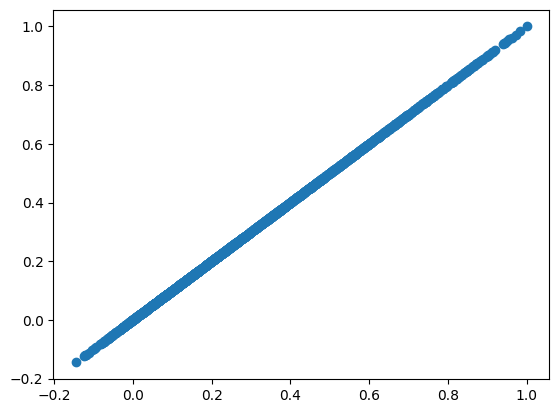

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

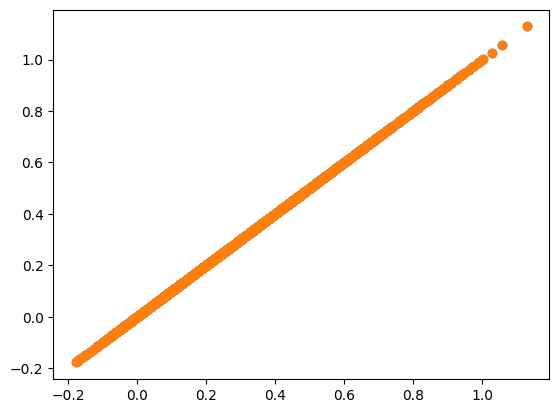

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[143.645996, 143.645996, 143.645996, ..., 143.645996, 143.645996,
        143.645996],
       [143.645996, 143.645996, 143.645996, ..., 143.645996, 143.645996,
        143.645996],
       [143.645996, 143.645996, 143.645996, ..., 143.645996, 143.645996,
        143.645996],
       ...,
       [143.645996, 143.645996, 143.645996, ..., 143.645996, 143.645996,
        143.645996],
       [143.645996, 143.645996, 143.645996, ..., 143.645996, 143.645996,
        143.645996],
       [143.645996, 143.645996, 143.645996, ..., 143.645996, 143.645996,
        143.645996]], shape=(50, 40))

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

point_Laplace


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:112: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(lm2 - lm1))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:86: RuntimeWarning: invalid value encountered in multiply
  alpha_frac = alpha * np.exp( np.clip(stats.norm.logpdf(alpha) - pnorm_diff, None, 700))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:105: RuntimeWarning: invalid value encountered in add
  upper_bd2 = (alpha ** 2 + alpha * beta + beta ** 2) / 3
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:87: RuntimeWarning: invalid value encountered in multiply
  beta_frac = beta * np.exp( np.clip(stats.norm.logpdf(beta) - pnorm_diff, None, 700))


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
fhat , s_f  = compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
ebnm_obj = ebnm_point_laplace_solver(x  = fhat, 
                          s= s_f  
                         ) 
ebnm_obj

In [11]:
ebnm_obj.post_mean
 

array([-0.11745618, -0.03850788, -0.15805305, -0.23717658, -0.16215253,
       -0.09281323, -0.20955797, -0.04115852, -0.02320996, -0.0735432 ,
       -0.24444334, -0.18781971, -0.17978796, -0.21338532, -0.23284479,
       -0.02763087,  0.00107556, -0.22518733, -0.19224469, -0.10280504,
       -0.08222982, -0.10678548, -0.12679383, -0.12367309, -0.11625615,
       -0.18341726, -0.1879844 , -0.23104348, -0.18307205, -0.14258522,
       -0.17701533, -0.16874212, -0.04398644, -0.1391447 , -0.16040321,
       -0.13283918, -0.20793119, -0.10522531, -0.08559287, -0.25190966])

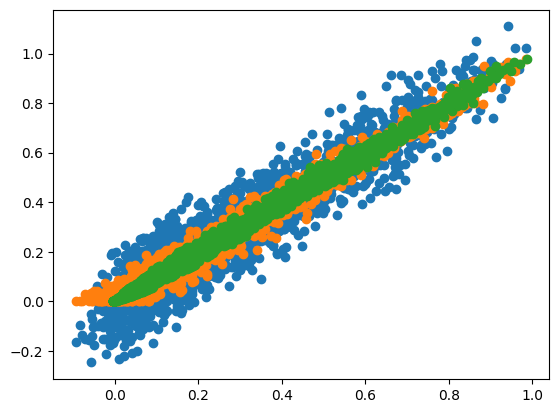

In [12]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


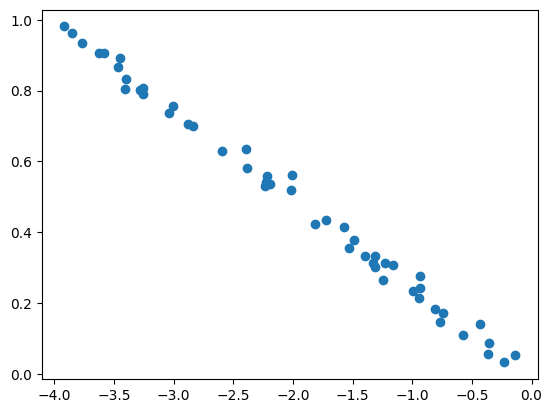

In [13]:
plt.scatter(mycebmf.L[:,0], u)

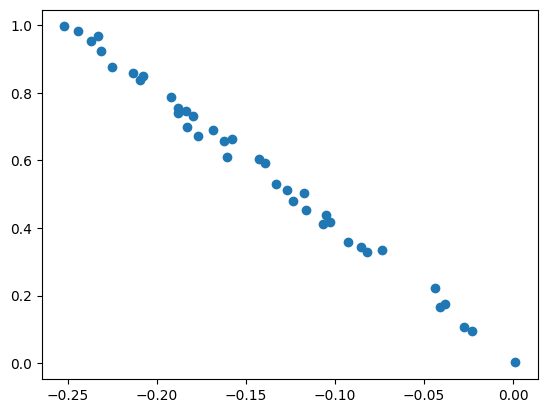

In [14]:
plt.scatter(mycebmf.F[:,0], v)

In [15]:
mycebmf.L[:,1]

array([-0.06674847,  0.0925185 ,  0.25613559, -0.10560993, -0.22297299,
       -0.11285346,  0.04831153,  0.04808191,  0.04059059,  0.02912478,
        0.05599993, -0.05231288, -0.23142044, -0.05023376,  0.02680932,
       -0.32938224, -0.17398253,  0.00213997, -0.03053901,  0.07112067,
       -0.0379806 ,  0.3170824 , -0.16027755, -0.01531649, -0.02279538,
       -0.08406388, -0.25421072,  0.26410036, -0.10094323,  0.03418945,
       -0.02649337,  0.08580065, -0.05628616, -0.08961449,  0.16188967,
        0.24435022,  0.03584961,  0.04310357, -0.0154772 ,  0.03885833,
       -0.061928  ,  0.05608303,  0.30363488,  0.01852656,  0.12827757,
       -0.13491769,  0.10775331, -0.0217658 ,  0.20971895,  0.06633843])

In [16]:
for i in range(40):
    mycebmf.iter()

D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:338: RuntimeWarning: divide by zero encountered in scalar divide
  dgrigh

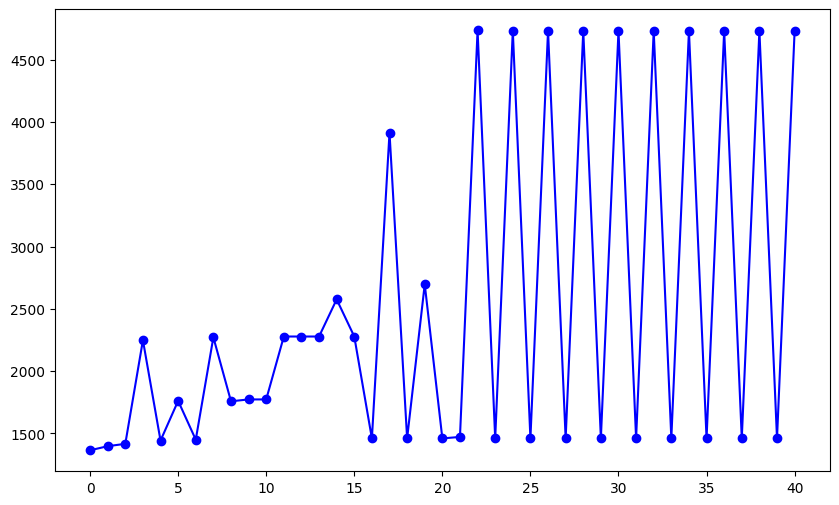

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

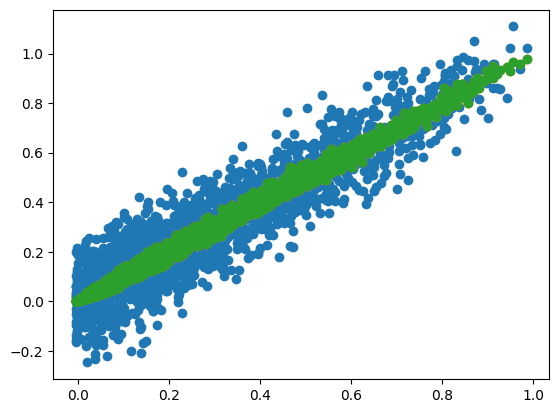

In [18]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [19]:
mycebmf.L
 

array([[-2.0108764 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.48466196,  0.        ,  0.        ,  0.        ,  0.        ],
       [-2.37730464,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.38757605,  0.        ,  0.        ,  0.        ,  0.        ],
       [-3.25085995,  0.        ,  0.        ,  0.        ,  0.        ],
       [-3.84645905,  0.        ,  0.        ,  0.        ,  0.        ],
       [-3.45852378,  0.        ,  0.        ,  0.        ,  0.        ],
       [-2.18669397,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.92923508,  0.        ,  0.        ,  0.        ,  0.        ],
       [-2.22773772,  0.        ,  0.        ,  0.        ,  0.        ],
       [-2.59172903,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.43002672,  0.        ,  0.        ,  0.        ,  0.        ],
       [-2.82947939,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.99941069,  0.        ,  0. 